## Menggambil library yang dibutuhkan saat menjalankan model



In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


## Melihat isi di dalam folder

In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

## Membagi data menjadi train dan testing(valdiation)


In [0]:
train_dataset = os.path.join(PATH, 'train')
test_dataset = os.path.join(PATH, 'validation')

In [0]:
train_cats_dataset = os.path.join(train_dataset, 'cats')  
train_dogs_dataset = os.path.join(train_dataset, 'dogs')  
test_cats_dataset = os.path.join(test_dataset, 'cats')  
test_dogs_dataset = os.path.join(test_dataset, 'dogs')

In [5]:
total_image_train = len(os.listdir(train_cats_dataset)) + len(os.listdir(train_dogs_dataset))
total_image_test= len(os.listdir(test_cats_dataset)) + len(os.listdir(test_dogs_dataset))

print('total training images:', total_image_train)
print('total testing images:', total_image_test)

total training images: 2000
total testing images: 1000


## Preprocessing data

In [0]:
#variabel yang digunakan untuk preprocessing data
BATCH_SIZE = 32 #Jumlah gambar yang digunakan dalam satu kali pemerosesan data
epochs = 50 #berapa kali model di latih
IMAGE_HEIGHT = 192 #tinggi gambar
IMAGE_WIDTH = 192 #lebar gambar

In [7]:
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.2,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode = 'reflect', # memiliki 4 ("constant", "nearest", "reflect" or "wrap") dimana memberikan variasi dari gambar untuk dilatih.
    cval=0.3
) # melakukan normalisasi data(gambar)

train_data_generator = training_data_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dataset,
                                                     shuffle=True,
                                                     target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                                     class_mode='binary')



#:
image_generator_test = ImageDataGenerator(rescale=1./255)
test_data_generator = image_generator_test.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=test_dataset,
                                                 target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Menampilkan isi data


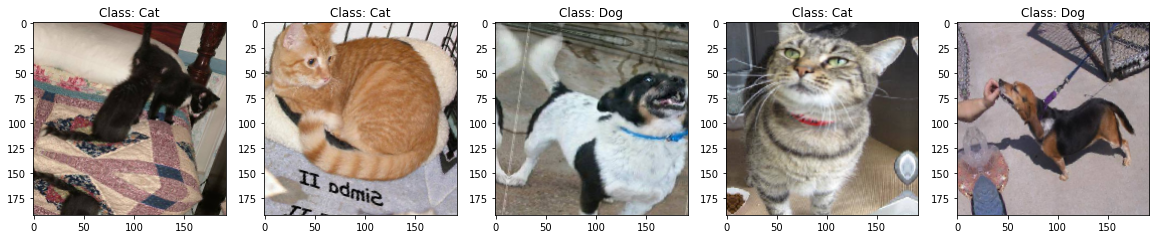

In [8]:
class_names=['Cat','Dog']
# "plotImages" function for vizualize data
def plotImages(images_set, label_set):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for images, label, ax in zip( images_set, label_set, axes):
          ax.imshow(images)
          ax.axis()
          no_label = int(label)
          ax.set_title("Class: {}".format(class_names[no_label]))
    plt.show()

#get sample training data for visualization
sample_training_images, sample_training_label = next(train_data_generator)

#Plot image using "plotImages" function
plotImages(sample_training_images[:5], sample_training_label[:5])

## Model

In [9]:
#Creat Model 
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH ,3)),
    MaxPooling2D(), # strides Faktor yang digunakan untuk menurunkan skala jika tidak dibuat maka akan default ke pool_size.
    Dropout(0.25, seed=42),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(), #pool_size digunakan untuk ukuran max pooling
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(), #padding terdapat 2(valid dan same) pilih case-insensitive tergantung kebutuhan
    Conv2D(256, 3, padding='same', activation='relu'),
    MaxPooling2D(), #data_format Urutan dimensi dalam input
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.25, seed=42),
    Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 192, 192, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 96, 96, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 96, 96, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 128)       0

Layer Dropout berfungsi untuk menghapus fitur-fitur tertentu. hal ini berguna untuk menghindari overfetting.
nah untuk menghandel overfeetingyang harus di lakukan ialah :
1. Tambahkan lebih banyak data
2. Gunakan augmentasi data
3. Gunakan arsitektur yang menggeneralisasi dengan baik
4. Tambahkan regularisasi
5. Mengurangi kompleksitas arsitektur.

In [0]:
#Compile Model 
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
#Train the model
history= model.fit_generator(
    train_data_generator,
    steps_per_epoch=total_image_train // BATCH_SIZE,
    epochs=epochs,
    validation_data=test_data_generator,
    validation_steps=total_image_test// BATCH_SIZE
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
62/62 [==============================] - 27s 436ms/step - loss: 0.7611 - accuracy: 0.5020 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/50
62/62 [==============================] - 27s 435ms/step - loss: 0.6934 - accuracy: 0.4995 - val_loss: 0.7057 - val_accuracy: 0.5020
Epoch 3/50
62/62 [==============================] - 27s 436ms/step - loss: 0.6934 - accuracy: 0.4975 - val_loss: 0.6922 - val_accuracy: 0.4970
Epoch 4/50
62/62 [==============================] - 27s 437ms/step - loss: 0.6917 - accuracy: 0.5005 - val_loss: 0.6901 - val_accuracy: 0.5000
Epoch 5/50
62/62 [==============================] - 27s 436ms/step - loss: 0.6903 - accuracy: 0.5005 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 6/50
62/62 [==============================] - 27s 440ms/step - loss: 0.6869 - accuracy: 0.5056 - val_loss: 0.6817 - val_accuracy: 0.4990
Epoch 7/50
62/62 [==============================] - 27s 439ms/step

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


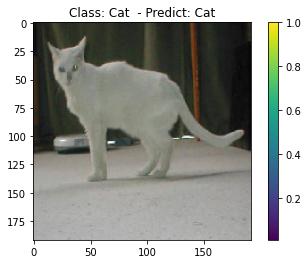

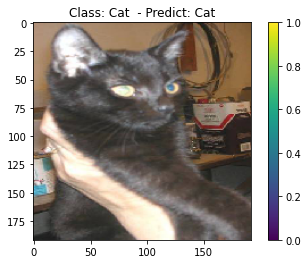

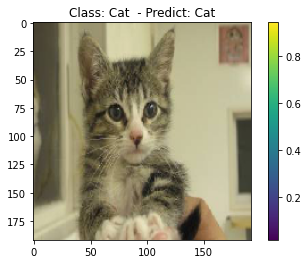

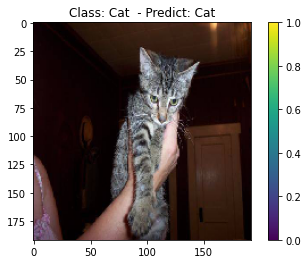

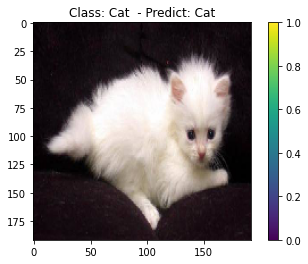

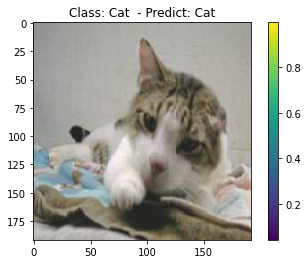

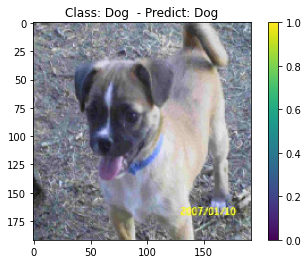

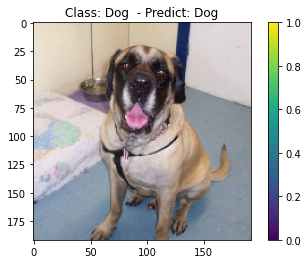

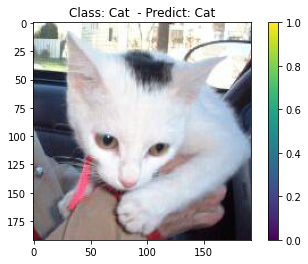

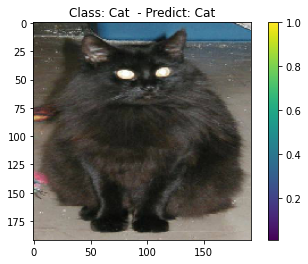

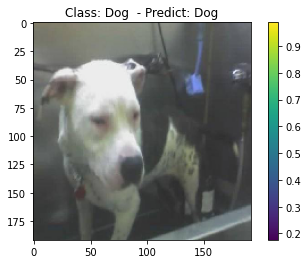

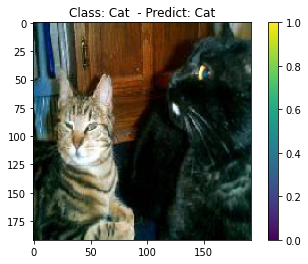

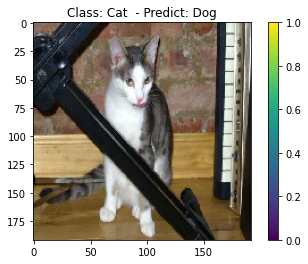

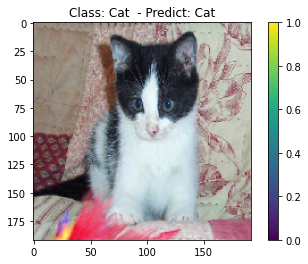

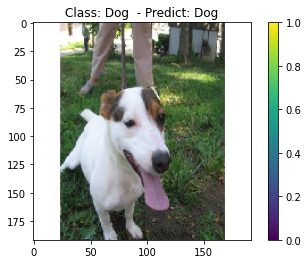

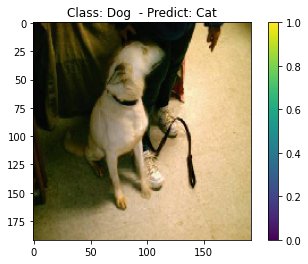

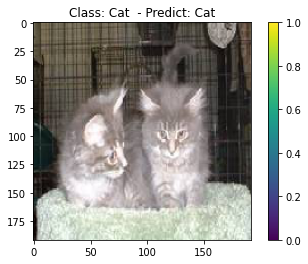

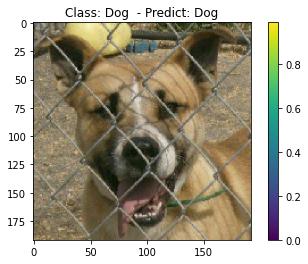

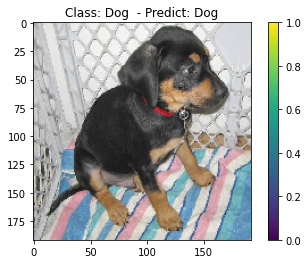

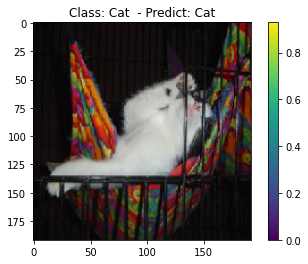

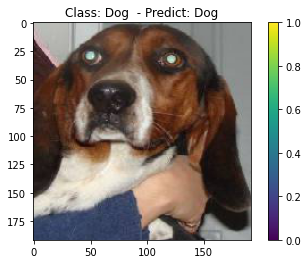

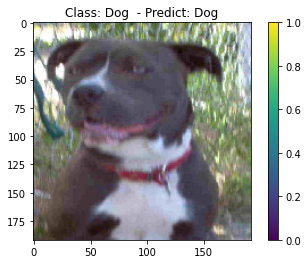

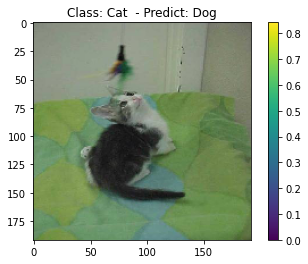

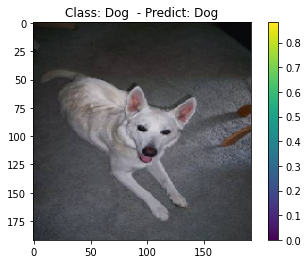

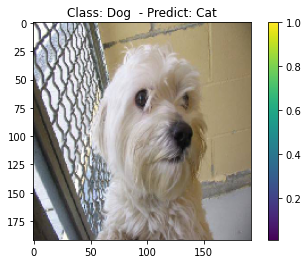

In [12]:
#Testing Data
for image_test, label_test in test_data_generator:
  break

pred = model.predict_classes(x = image_test)

#Visualize test_dataset dengan label dan prediktsinya
for i in range (0,25):
  test = image_test[i]
  label = label_test[i]
  label_pred =(pred[i])
  plt.figure()
  plt.imshow(test)
  plt.title("Class: {}  - Predict: {}".format(class_names[int(label)], class_names[int(label_pred)]))
  plt.colorbar()
  plt.grid(False)
  plt.show

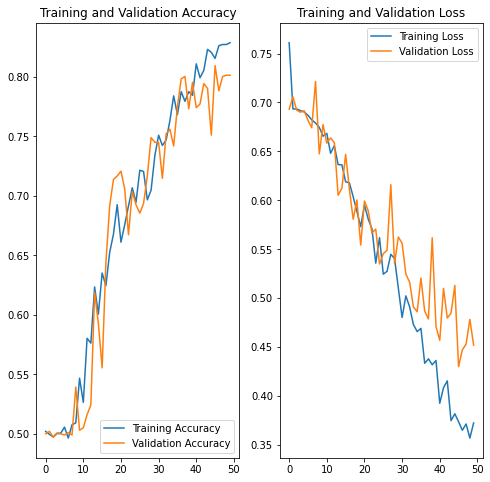

In [13]:
#Plot accuracy and loss dari training dataset dan testing dataset
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
#Evaluate Model in validation data
model.evaluate(test_data_generator)

   2662/Unknown - 316s 119ms/step - loss: 0.4502 - accuracy: 0.8020

Kesimpulan :
Tujuan dari model dapat membedakan apakah suatu gambar bernar seekor anjing atau kucing. Model sekuensial  terdiri dari beberapa lapisan konvolusional yang meningkatkan ukuran kernel dengan kumpulan post-max dropout kecil. train data pada kali ini berisi 2000 gambar, dengan distribusi antara kucing dan anjing adalah sama. Augmentasi gambar dilakukan pada data pelatihan tetapi tidak pada data validasi. Model terbaik mencapai akurasi pelatihan(82.88)% dan validasi (80.14)%. 
